<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Stable_and_Controllable_Neural_Texture_Synthesis_and_Style_Transfer_Using_Histogram_Losses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stable and Controllable Neural Texture Synthesis and Style Transfer Using Histogram Losses**

논문 링크: https://arxiv.org/abs/1701.08893

이전의 논문인 'Image Style Transfer Using Convolutional Neural Networks'에서 style transfer를 주제로 좋은 성능을 보여줬다. 하지만 여전히 텍스쳐 합성(perform texture)을 할 때 생기는 불안정은 개선해야할 문제점으로 남아있었다.

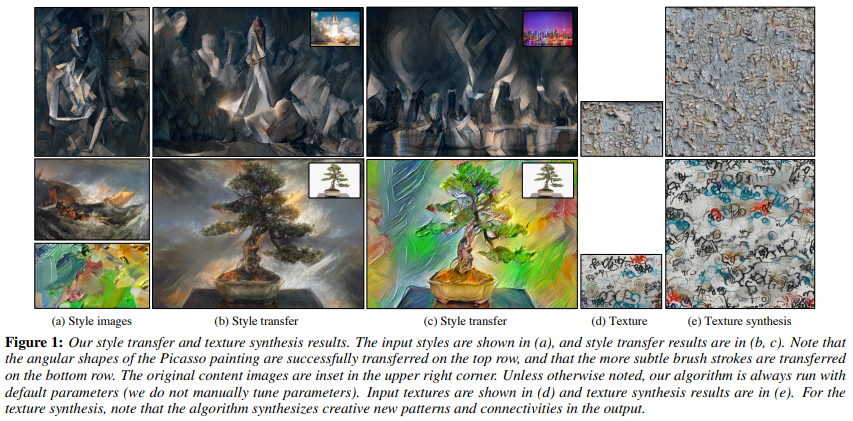

먼저 위의 그림 Figure 1을 보면 해당 논문의 결과물을 볼 수 있다. style images (a)에 대해 style transfer을 적용시킨 결과물이 (b), (c)이다. (b와 c에서 오른쪽 상단에 위치한 image가 바로 content image이다.) 그리고 texture images (d)에 대해 texture synthesis를 적용시킨 결과물이 (e)이다. 여기서 중요한 사실은 본 논문의 아이디어를 적용하여 **사용자가 굳이 parameter를 튜닝하지 않아도 저렇게 안정적이고 좋은 결과물이 나온다**는 것이다.

## **The problem: instabilities**

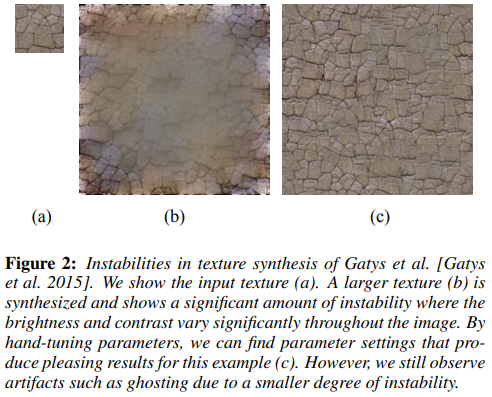

이렇게 기존 논문 'Image Style Transfer Using Convolutional Neural Networks'에 나와있듯이 content loss를 주지 않고 style loss만 주면 같은 패턴을 가진 더 큰 image를 합성할 수 있다. 하지만, 위의 그림 Figure 2를 보면 기존 텍스쳐 합성 기술의 불안정성을 보여준다. 특히 (b)와 같이 출력 크기가 크면 위와 같이 밝기와 대비가 크게 달라지는 상당한 양의 불안정성을 보여준다. parameter를 튜닝함으로써 (c)와 같은 결과를 얻을 수 있지만 이는 사람의 작업이 들어간다는 점에서 비효율적인 방식이다.

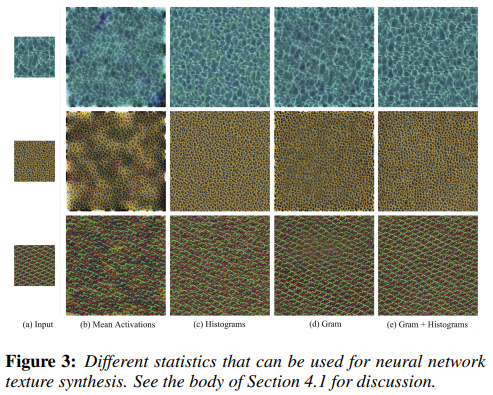

위의 그림 Figure 3을 보면 여러 statistics를 적용시켜본 결과인데, 본 논문의 핵심 아이디어가 되는 Gram + Histograms가 가장 좋은 결과를 보여주는 것을 알 수 있다.

그러면 과연 왜 단순히 Gram Matrix만 사용하는데에 한계점이 있을까?

### **Gram Matrix**

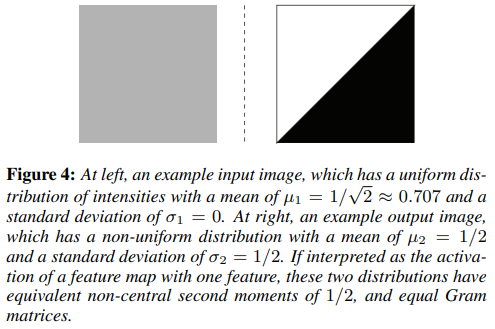

Gram Matrix의 한계점은 바로 위의 그림 Figure 2와 같이 **평균과 분산이 전혀 다른 feature map이 동일한 gram matrix를 가질 수 있다는 것**이다.

## **Solution: Histogram Losses**

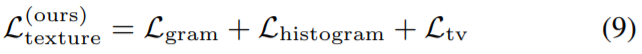

따라서 본 논문에서는 위의 식과 같이 Histogram loss를 추가로 넣어 histogram matching으로 feature map의 분포를 맞춰주었다. (또한, output image의 부르러움을 더욱 개선하기 위해 total variation loss를 추가하였다.)

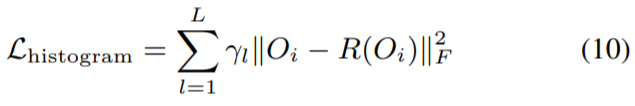

위의 식이 바로 histogram loss이다. 이때 S는 input texture, O_ij는 convolution layer i과 feature j에 대한 output activation이며, 다시 remapping이 된 것이 O'_ij이다. 그리고 γl 은 hyper-parameter이다. (backpropagation은 기울기를 O_i와 O'_i 사이의Frobenius norm 개념을 이용하여 진행된다.)

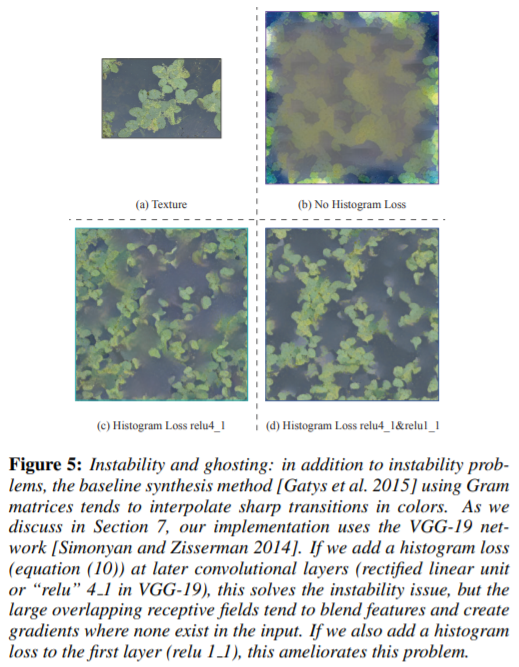

위의 그림 Figure 5를 보면 해당 논문의 아이디어인 histogram loss를 추가함으로써 instability 문제와 ghosting 문제를 해결하였다는 것을 알 수 있다. model의 경우는 VGG-19를 사용하였는데 (c) 부분을 보면 알 수 있듯이 불안정성(instability) 문제는 해결이 되었지만 겹치는 features를 blending하고 input에 아무것도 없는 gradient를 생성하는 경향이 있다. 따라서 (d) 부분과 같이 첫번째 layer를 추가함으로써 이 문제를 개선하였다.

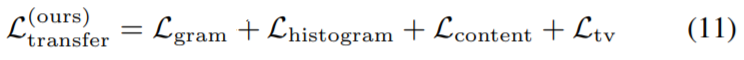

그리고 texture synthesis를 확장한(+ content loss) 것이 바로 위의 식인 style transfer loss이다.

## **Experiments**

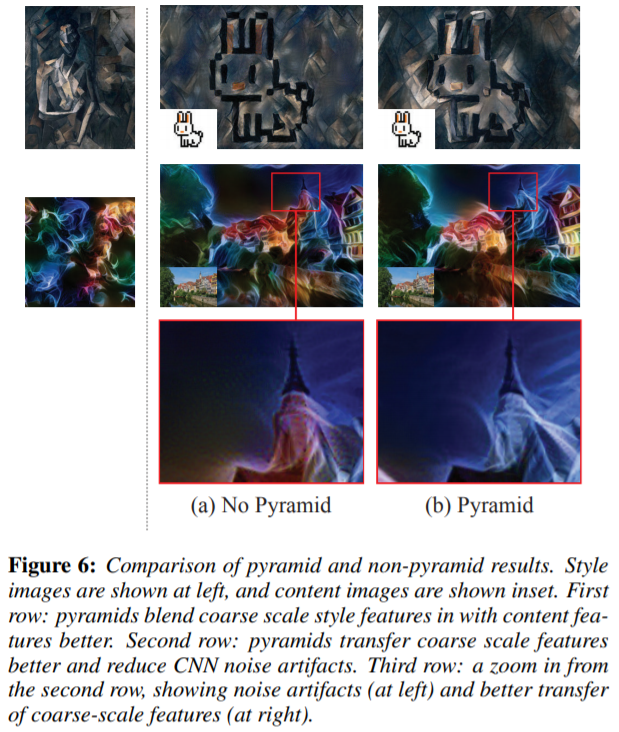

위의 그림 Figure 6은 Pyramid 유무에 따른 결과물들을 보여준다.

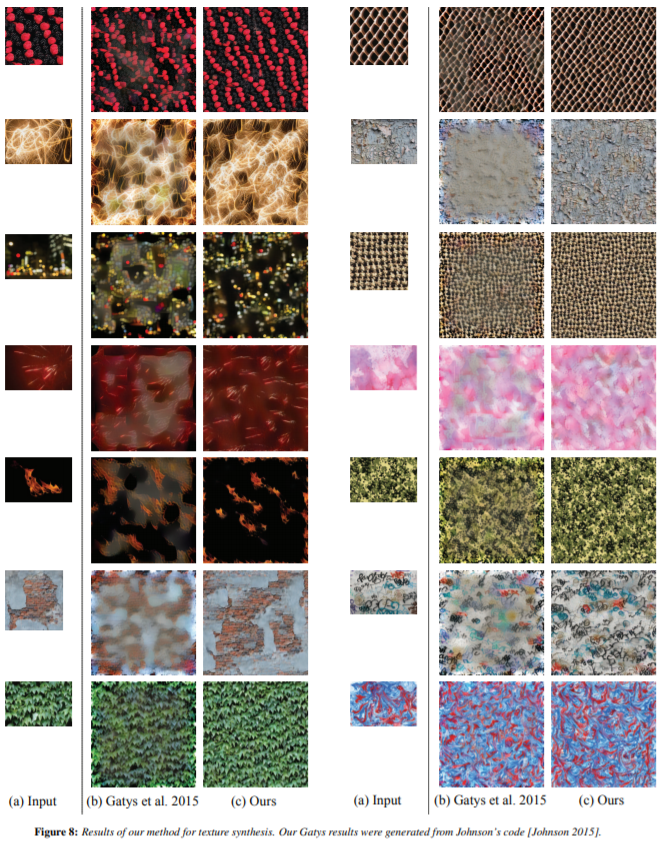

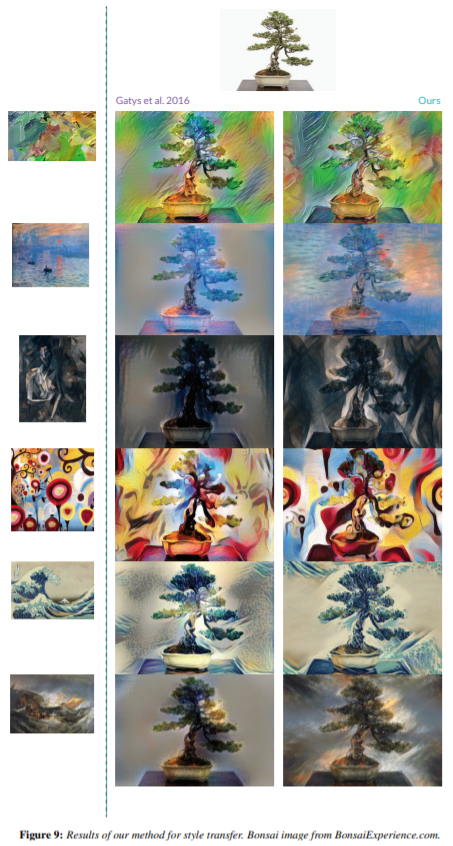

위의 그림들 Figure 8과 Figure 9는 기존 방법과 비교한 결과이다. (그림이 더 있지만 이는 본 논문을 직접 들어가서 보는 것을 추천한다.)

그리고 본 논문에서는 Histogram loss 외에 그림의 영역을 나누어서 style transfer 하는 localized style transfer도 다루고 있다. 하지만 이는 생략하겠다.